In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [6]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [7]:
X = pd.concat([X,geography,gender], axis=1)

In [8]:
X = X.drop(['Geography','Gender'],axis=1)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### Scaling 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create ANN

### Importing the keras libraries and packages 

In [15]:
import keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import SGD

### Initializing ANN

In [17]:
classifier = Sequential()

### Adding input layers and hidden layers

In [18]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform', activation='relu',input_dim=11))

In [19]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))

In [20]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation= 'sigmoid'))

### Compiling ANN

In [21]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fitting ANN in trainig dataset

In [22]:
model = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs= 100)

Epoch 1/100


2023-11-18 12:42:24.676853: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


536/536 [==============================] - 0s 499us/step - loss: 0.4934 - accuracy: 0.8003 - val_loss: 0.4698 - val_accuracy: 0.7978
Epoch 2/100
536/536 [==============================] - 0s 379us/step - loss: 0.4500 - accuracy: 0.8095 - val_loss: 0.4500 - val_accuracy: 0.8031
Epoch 3/100
536/536 [==============================] - 0s 375us/step - loss: 0.4328 - accuracy: 0.8115 - val_loss: 0.4433 - val_accuracy: 0.8023
Epoch 4/100
536/536 [==============================] - 0s 373us/step - loss: 0.4256 - accuracy: 0.8147 - val_loss: 0.4373 - val_accuracy: 0.8084
Epoch 5/100
536/536 [==============================] - 0s 375us/step - loss: 0.4206 - accuracy: 0.8166 - val_loss: 0.4335 - val_accuracy: 0.8065
Epoch 6/100
536/536 [==============================] - 0s 374us/step - loss: 0.4165 - accuracy: 0.8210 - val_loss: 0.4299 - val_accuracy: 0.8103
Epoch 7/100
536/536 [==============================] - 0s 376us/step - loss: 0.4122 - accuracy: 0.8216 - val_loss: 0.4234 - val_accuracy: 0.81

In [23]:
### list all data in history

In [24]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Summarize history of accuracy

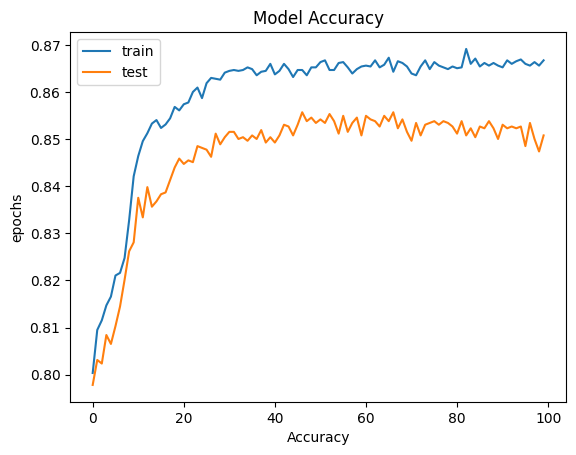

In [25]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')

### Summarize history of loss

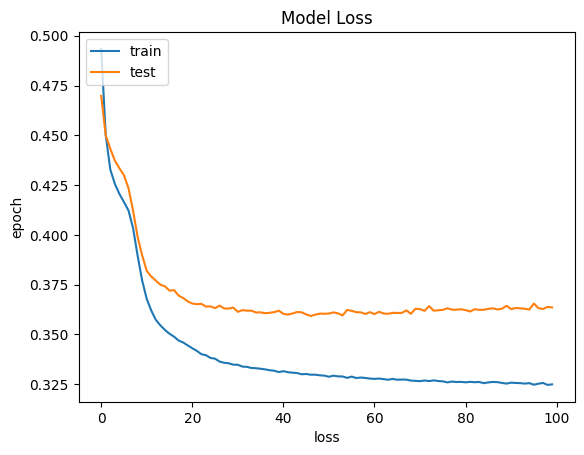

In [26]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')

### Making Predictions 

In [27]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 244us/step


### Making confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[1535,   60],
       [ 216,  189]])

### Calculate accuracy

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
score = accuracy_score(y_pred,y_test)

In [33]:
score

0.862